# K-MEANS CLUSTERING

We aim to get two clusters: tweets related to politics and irrelevant topics such as marketing.

#### Preprocessing

In [ ]:
# remove punctuations
df['clean_tweet'] = df['tweet'].str.replace('[^\w\s]', '', regex=True)

# covert tweet to lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: str(x).lower())
 

In [ ]:
# Tokenization - breaking the raw text into small chunks(sentences into words)

nltk.download('punkt')
from nltk.tokenize import word_tokenize

# apply tokenization function
df['clean_tweet'] = df['clean_tweet'].apply(nltk.word_tokenize)

In [ ]:
df['clean_tweet']

0         [county, charters, that, form, the, basis, of,...
1         [hii, ndio, ubaya, ya, kukosa, degre, being, a...
2         [mathira, mp, rigathi, gachagua, says, azimio,...
3         [my, brother, brian, did, i, not, tell, you, a...
4         [azimio, we, are, here, to, stay, na, wajue, n...
                                ...                        
425337          [wajackoyah, just, waiting, for, the, date]
425338             [seem, wajackoyah, supplies, are, legit]
425339    [wajackoyah, and, this, is, without, handouts,...
425340    [man, explaining, how, wajackoyah, will, pay, ...
425341    [wajackoyah, should, come, and, defend, his, s...
Name: clean_tweet, Length: 425342, dtype: object

In [ ]:
# removing stopwords
import nltk
stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ['we', 'you', 'you ve', 'need', 'know', 'youre', 'ya', 'na']

# function to remove stopwords

def remove_stopwords(tweet):
    output = [word for word in tweet if word not in stop_words]
    return output

df['clean_tweet']= df['clean_tweet'].map(remove_stopwords)   

In [ ]:
df['clean_tweet']

0         [county, charters, form, basis, kenya, kwanza,...
1         [hii, ndio, ubaya, kukosa, degre, azimios, eco...
2         [mathira, mp, rigathi, gachagua, says, azimio,...
3         [brother, brian, tell, azimio, copying, notes,...
4         [azimio, stay, na, wajue, na, mapema, mnaenda,...
                                ...                        
425337                          [wajackoyah, waiting, date]
425338                  [seem, wajackoyah, supplies, legit]
425339                [wajackoyah, without, handouts, mind]
425340    [man, explaining, wajackoyah, pay, chinese, lo...
425341    [wajackoyah, come, defend, supportermanifesto,...
Name: clean_tweet, Length: 425342, dtype: object

In [ ]:
#Lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# function for lemmaization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

nltk.download('omw-1.4')

# apply function on tweets
df['clean_tweet']=df['clean_tweet'].map(lemmatizer)     

In [ ]:
# convert each clean tweet from list into a string
df['string_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([str(word) for word in x]))

In [ ]:
df['string_tweet']

0         county charter form basis kenya kwanza plan si...
1         hii ndio ubaya kukosa degre azimios economist ...
2         mathira mp rigathi gachagua say azimio la umoj...
3         brother brian tell azimio copying note today b...
4         azimio stay na wajue na mapema mnaenda nyumban...
                                ...                        
425337                              wajackoyah waiting date
425338                         seem wajackoyah supply legit
425339                      wajackoyah without handout mind
425340    man explaining wajackoyah pay chinese loan bha...
425341    wajackoyah come defend supportermanifesto acti...
Name: string_tweet, Length: 425342, dtype: object

In [ ]:
data = df[['string_tweet', 'retweet_count']]

In [ ]:
# applying TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['string_tweet'])

In [ ]:
# assuming the 2 clusters
from sklearn.cluster import KMeans

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_


In [ ]:
# append labels to a dataframe

df1 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])

In [ ]:
# creating cluster dataframes
cluster_1 = df1[df1.cluster == 0]
cluster_2 = df1[df1.cluster == 1]

In [ ]:
# wordcloud plot function 

from wordcloud import WordCloud, STOPWORDS 

def plot_wordcloud(dataframe):
     
     stopwords = set(STOPWORDS) 

     allWords = ' '.join([twts for twts in dataframe['tweet']])

     plt.figure(figsize=(12,5))

     wordCloud = WordCloud(width = 1000, height = 600, random_state = 12, max_font_size = 119, stopwords = stopwords).generate(allWords)

     plt.imshow(wordCloud, interpolation = 'bilinear')

     plt.axis('off')

     return plt.show()

In [ ]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

def bigram_plot(dataframe, cluster):
    tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
    tfidf_matrix = tf.fit_transform(dataframe['tweet'])
    total_words = tfidf_matrix.sum(axis=0)
    #Finding the word frequency
    freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    #converting into dataframe
    bigram = pd.DataFrame(freq)
    bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
    #Taking first 20 records
    bigram = bigram.head(20)
    #Plotting the bigram distribution
    bigram.plot(x ='bigram', y='count', kind = 'bar', figsize = (15,7),cmap='Accent')
    plt.title(f"Bigram disribution for the top 20 words({cluster})", color = 'red')
    plt.ylabel('Count')
    return plt.show()

In [ ]:
# get sample of tweets in the first cluster
cluster_1.sample(10)

tweet  cluster
68591   shame shame githeri medium u tried humiliate r...        0
138388                                    advisor wa ruto        0
141409  gonza yaani ruto aende mzee wa 80 abaki unajis...        0
225069  poll let vote nairobi polycarp igathe moses ku...        0
78435                                       ruto gyu pink        0
114311  ruto naivasha government build port create job...        0
310578  ruto govern country dp rutos amaco fails stop ...        0
227379  rigathi gachagua chest thumping bully leader d...        0
97759      every time see picture ruto word freedom laugh        0
229268  anyway ignore gachagua ever existed ruto ndo s...        0

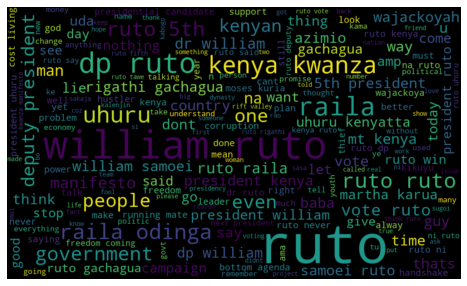

In [ ]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)

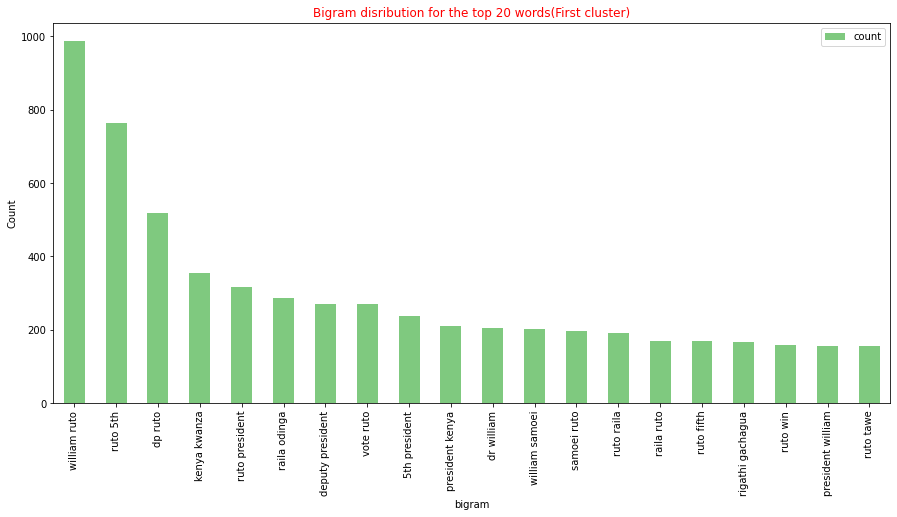

In [ ]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

The first cluster contains events surrounding DP William Ruto.

In [ ]:
# get sample of tweets in the first cluster
cluster_2.sample(10)

tweet  cluster
404719  spitfire vb tropical serial er20 code vfd 5th ...        1
163832  wow tweet raila ondinga leo umeamka na mguu ga...        1
78020   yes two set camped tl never seen anything keny...        1
14448   kindly tell bro ahmedin development planning b...        1
236572  despite serving alcohol amp whisky forty forty...        1
201170          wajackoyah bhang plantation mainly export        1
67258                                  paper foron podium        1
85510                       wish best let dream come true        1
278240                                   raila simply 5th        1
410711  time folk annual carmel basketball golf outing...        1

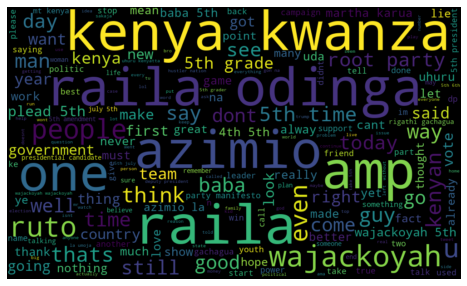

In [ ]:
plot_wordcloud(cluster_2)

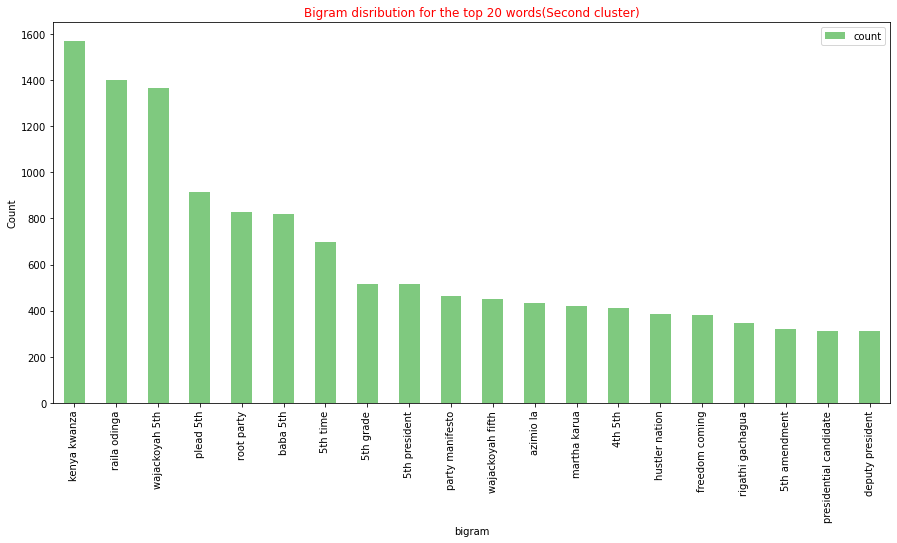

In [ ]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')

The second cluster involves events surrounding Raila and Wajackoyah.

### Three Clusters

In [ ]:
# assuming the 3 clusters(Ruto, Raila, Wajackoyah)
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [ ]:
# creating a dataframe for these new clusters
df2 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])

In [ ]:
# creating cluster dataframes
cluster_1 = df2[df2.cluster == 0]
cluster_2 = df2[df2.cluster == 1]
cluster_3 = df2[df2.cluster == 2]

In [ ]:
# get sample of tweets in the first cluster
cluster_1.sample(10)

tweet  cluster
177507         fred okongo dontlie raila odingathere vote        0
298088  muya gaturu mwangi david humphrey lovely stuff...        0
51974   murathe 𝐌𝐮𝐫𝐚𝐭𝐡𝐞 𝐡𝐮𝐰𝐚 𝐡𝐚𝐮𝐧𝐚 𝐣𝐚 𝐤𝐮𝐬𝐞𝐦𝐚 𝐤𝐚𝐛𝐢𝐬𝐚 𝐰𝐚...        0
356441                                bro tunaanza na 5th        0
246144                           kenya ke trueinnocent un        0
183008                    remember moi left kibaki left n        0
17886              azimio removing bahati mathare mp race        0
120416  term moja ushanzisha shule yako ushaiskia kiba...        0
29989   leader transform nation land opportunity growt...        0
424178             igue ngomawajackoyah league manman vie        0

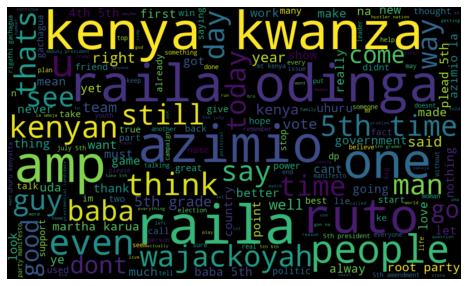

In [ ]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)

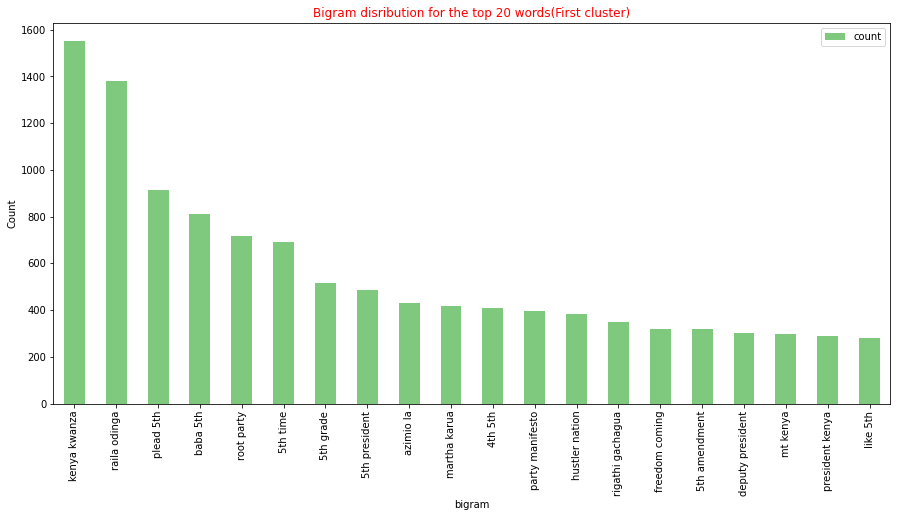

In [ ]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

The first cluster focuses on events surrounding presidential aspirant Raila Odinga , the fifth and Kenya Kwanza party.

In [ ]:
# get sample of tweets in the first cluster
cluster_2.sample(10)

tweet  cluster
217415  watch tumeenda azimio mwizi hii drama william ...        1
19701   ruto appointed gachagua lock mt kenya azimio u...        1
211400  dp ruto dp office nothing offer deliver accept...        1
77563   deep inside dont message manifesto launch fail...        1
100199  show always partisan nderitu michael njenga li...        1
57831   hand tied chebukati throw ruto bus vow never h...        1
43174   sam254 ukipata shika mbili na moja yangu basi ...        1
259887                 uhuru remained kanu long ruto left        1
69801   nhif fall considerably short ruto manifesto pr...        1
91062             ra0 yh kan ava doank brrti km bkan ruto        1

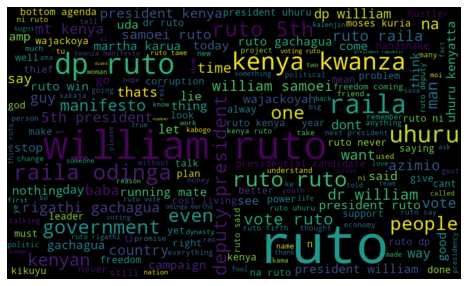

In [ ]:
# plot word cloud for second cluster
plot_wordcloud(cluster_2)

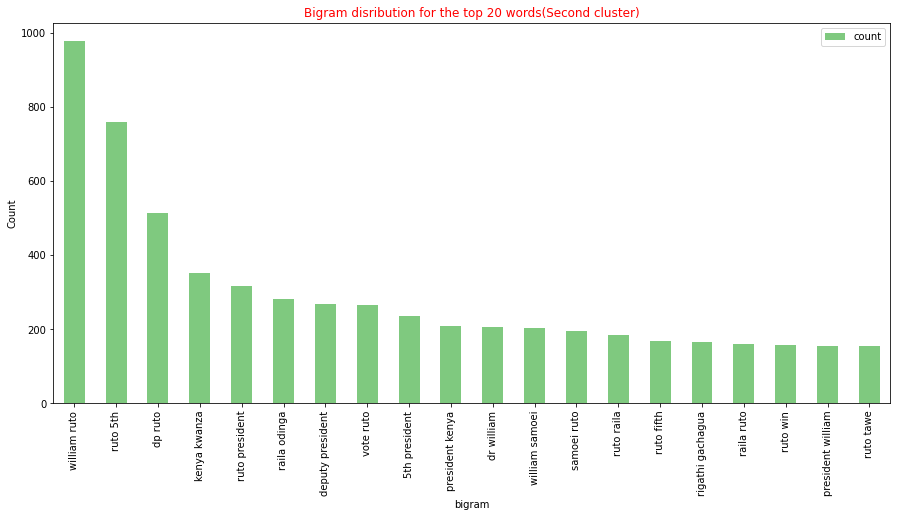

In [ ]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')

The second cluster focuses on events surrounding Ruto.

In [ ]:
# get sample of tweets in the first cluster
cluster_3.sample(10)

tweet  cluster
27769   would vote next president kenya retweet wajack...        2
200786  wajackoyah bhang save patient suffering cancer...        2
151702  wajackoyah iconicc thegoon umejua mwenye umese...        2
206518                                  nyagah wajackoyah        2
204633  never yin government involved scandal presiden...        2
420366  ama wajackoyah ni ule msee wa designated survivor        2
422245            see reality service delivery wajackoyah        2
423338  let disappoint raila ruto tuvotie wajackoyah b...        2
208200  dnt drink alcoholi wajackoyah member welcome j...        2
198804  nimeenda kupigia wajackoyah kura expect september        2

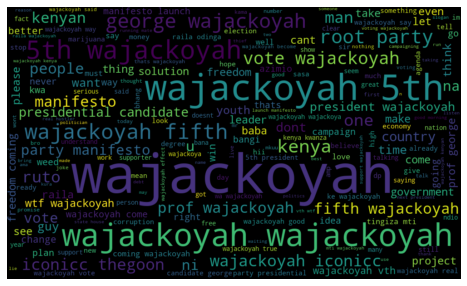

In [ ]:
# plot word cloud for third cluster
plot_wordcloud(cluster_3)

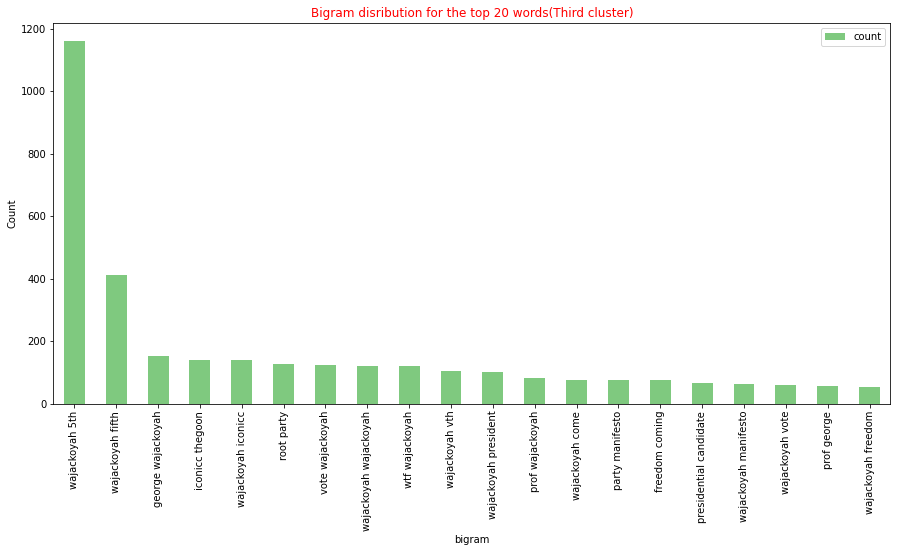

In [ ]:
# bigram plot for third cluster
bigram_plot(cluster_3,'Third cluster')

The third cluster focuses on events surrounding presidential aspirant, Wajackoyah.

#### **Finding optimal number of clusters**

In [ ]:
# Perform Kmeans

from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(2,21)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km =km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

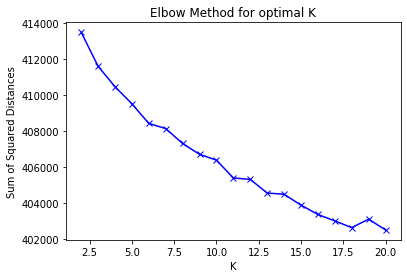

In [ ]:
# Plotting the results
plt.plot(K, sum_of_squared_distances,'bx-')
plt.title('Elbow Method for optimal K')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances') 
plt.show() 


Elbow method suggests 6 clusters.

### 6 Clusters

In [ ]:
# assuming the 6 clusters

from sklearn.cluster import KMeans

k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [ ]:
# creating a dataframe for these new clusters
df3 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])

In [ ]:
# creating cluster dataframes
cluster_1 = df3[df3.cluster == 0]
cluster_2 = df3[df3.cluster == 1]
cluster_3 = df3[df3.cluster == 2]
cluster_4 = df3[df3.cluster == 3]
cluster_5 = df3[df3.cluster == 4]
cluster_6 = df3[df3.cluster == 5]

In [ ]:
# get sample of tweets in the first cluster
cluster_1.sample(10)

tweet  cluster
420702                                     wajackoyah 5th        0
423239                                   wajackoyah thank        0
416957                   wajackoyah also stimulate donkey        0
413414  wajackoyah government anything na ukiingia saa...        0
203243  q inspired run president prof wajackoyah responds        0
380145                          wajackoyah 5th wajackoyah        0
208697  please wajackoyah dont go close power youth th...        0
202003                                   wajackoyah fifth        0
205598  prof george wajackoyah government export snake...        0
206444                    wajackoyah chance change nation        0

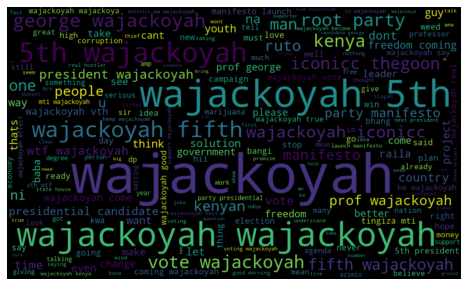

In [ ]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)

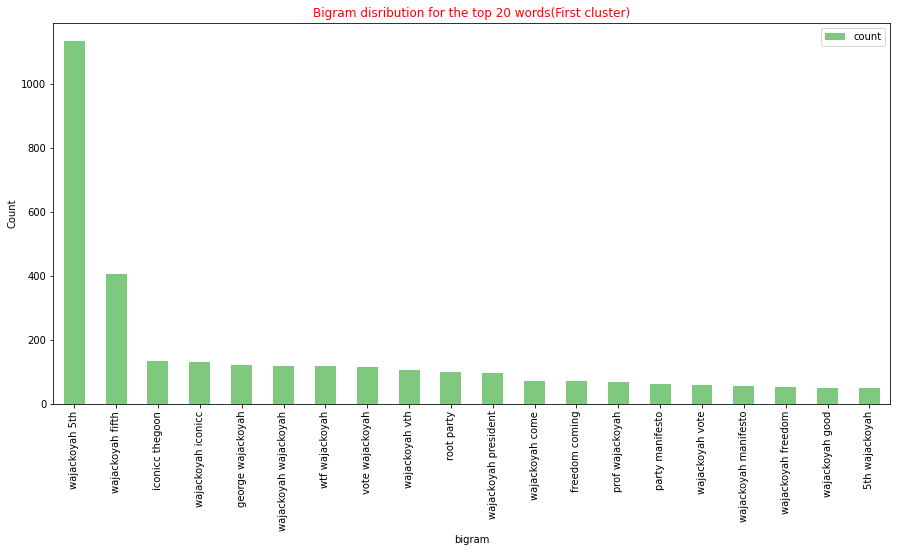

In [ ]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

The first cluster involves events surrounding George Wajackoyah.

In [ ]:
# get sample of tweets in the second cluster
cluster_2.sample(10)

tweet  cluster
81192   ruto part government last 0yrs p go question r...        1
62016   dp ruto kick journalist njoro meeting discus i...        1
46213   dont want dry pussy government office period s...        1
315112  kabogo must stop begging ruto needed man never...        1
103041  ruto single handedly rubbed enigma brand raila...        1
109123       ke mkuu bdo naona ruto area qan c wa io side        1
87382   please stick manifesto stop campaigning ruto e...        1
73401   bhangi carry demon spirit confusion tv station...        1
69089                              ruto national heritage        1
63877                                          ruto fifth        1

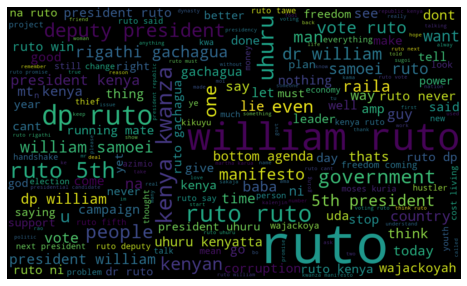

In [ ]:
# plot word cloud for second cluster
plot_wordcloud(cluster_2)

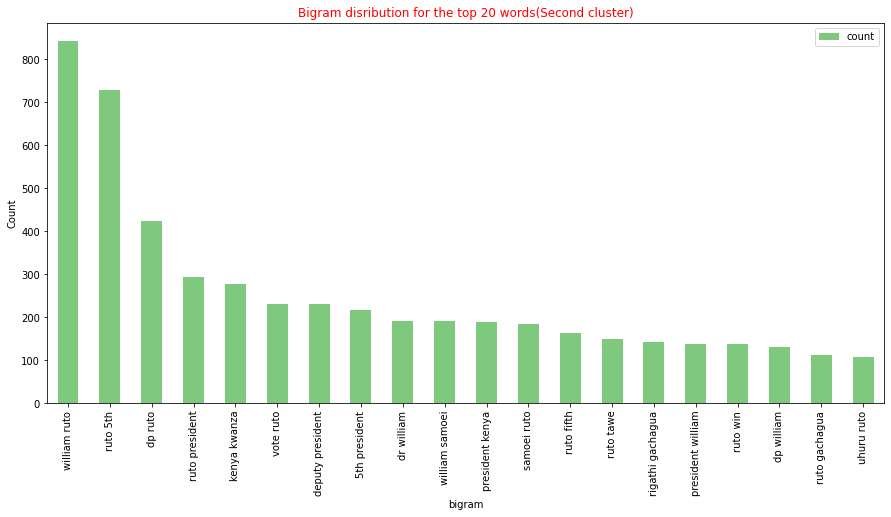

In [ ]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')

The second cluster involves events surrounding William Ruto.

In [ ]:
# get sample of tweets in the third cluster
cluster_3.sample(10)

tweet  cluster
128410  mwangi david gaturu humphrey oppressor raila j...        2
186418  raila realized quite late greedy quest preside...        2
169443  raila odinga social protection program exist k...        2
157234    raila going bondo area code sooner expectedalas        2
157395  say jehovah wanyonyi raila verse karua verse 4...        2
167392                 ndio huyo wewe ukiita raila welder        2
150750                          kn mokaya yes think raila        2
249883                mt kenya vote sake would vote raila        2
15175   raila explain action plan see azimio governmen...        2
156511                 soo sad wonder raila endorse uhuru        2

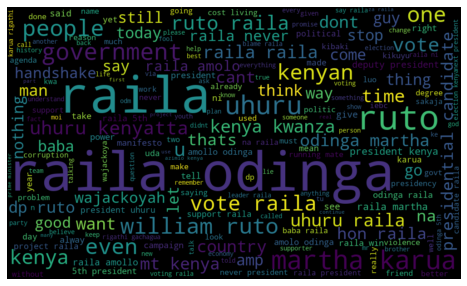

In [ ]:
# plot word cloud for third cluster
plot_wordcloud(cluster_3)

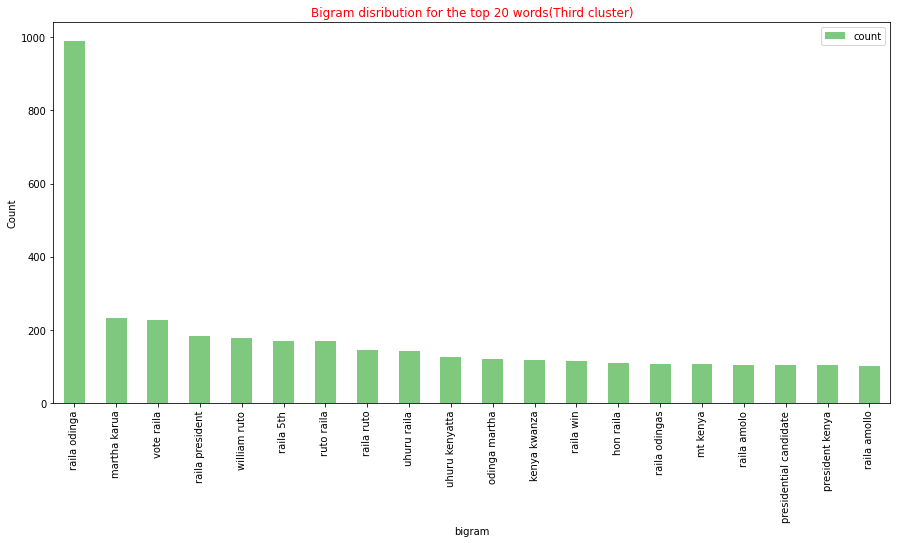

In [ ]:
# bigram plot for third cluster
bigram_plot(cluster_3,'Third cluster')

The third cluster contains vocabulary surrounding major presidential aspirant, Raila Odinga. 

In [ ]:
# get sample of tweets in the fourth cluster
cluster_4.sample(10)

tweet  cluster
219019     driver driver alight u azimio team faree ended        3
8008                                      azimio violence        3
25288   president kenyatta convenes azimio council mee...        3
26857                                    direction azimio        3
219536  dont support im azimio dont support hon babu o...        3
301397  mimi jina langu busia ni azimio baba lazima apite        3
213371    chance high kanini kicked azimio low tone james        3
11610   excitement endif god forbid azimio winsshe rea...        3
3402                      wamama wangapi azimio imetambua        3
25407   martha karua assignment popularise azimio inst...        3

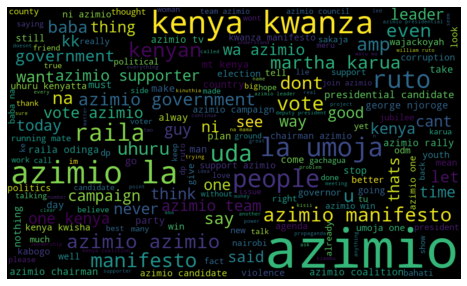

In [ ]:
# plot word cloud for fourth cluster
plot_wordcloud(cluster_4)

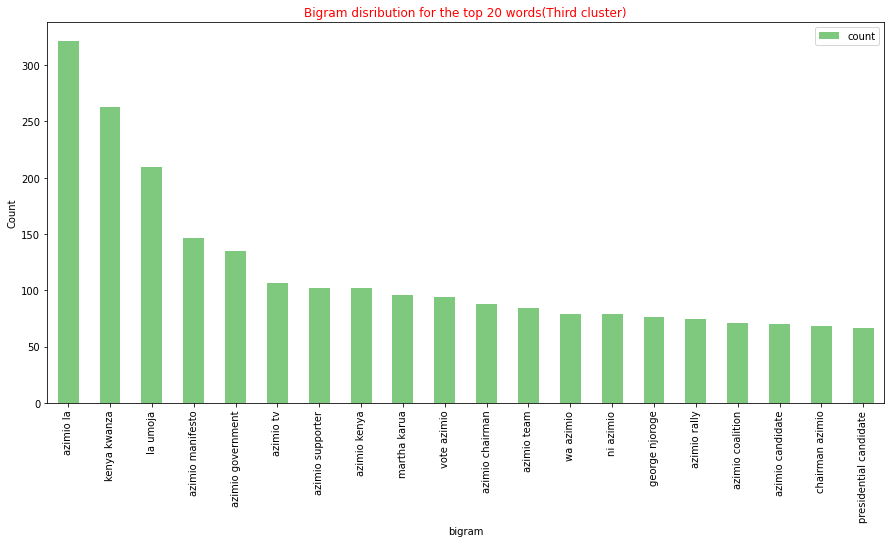

In [ ]:
# bigram plot for fourth cluster
bigram_plot(cluster_4,'Fourth cluster')

The fourth cluster contains events surrounding the Azimio la Umoja party.

In [ ]:
# get sample of tweets in the fifth cluster
cluster_5.sample(10)

tweet  cluster
389100  na tell una votenoise makerssee queen get vote...        4
412737          lady room saying 4 girl already 2 boy 5th        4
374367  proof debut uk album chart twt 5th top 0 th ov...        4
392176  meet tier two sponsor black box hear expert in...        4
356945  one post one lunch quince 5th grade ill let u ...        4
352796  tobymac set filming song eye 5th studio album ...        4
322859       future hand mr president 5th full confidence        4
383427  5th na first lady mtazidi kulia miti zinaendel...        4
337285                         5th wave covid mo botswana        4
361178  covid 5th leading cause death child cancun ted...        4

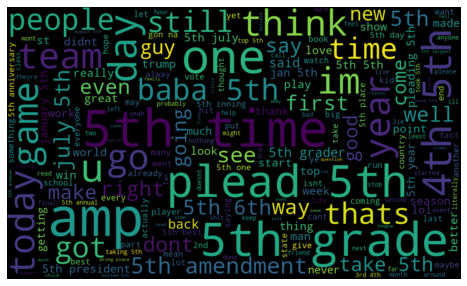

In [ ]:
# plot word cloud for fifth cluster
plot_wordcloud(cluster_5)

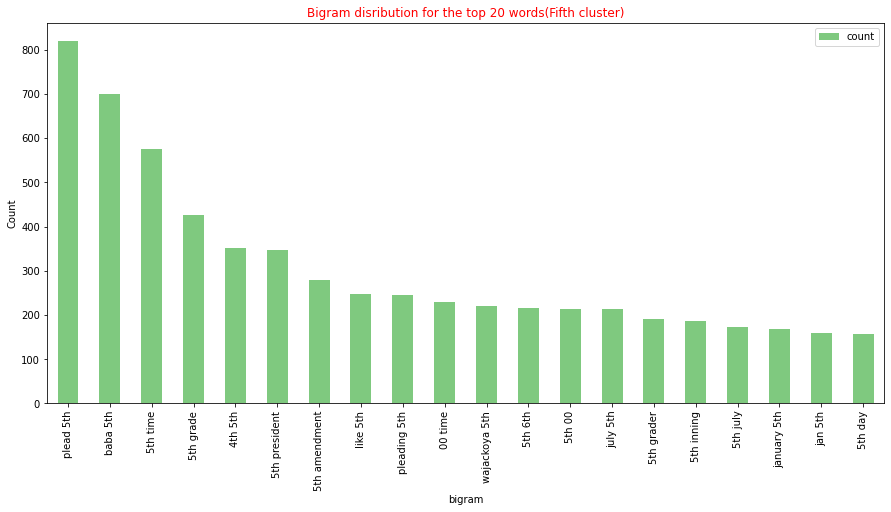

In [ ]:
# bigram plot for fifth cluster
bigram_plot(cluster_5,'Fifth cluster')

The fifth cluster focuses on 'The Fifth', a term that has been used predominantly on twitter mostly referring to the fifth president of Kenya. This shows Kenyan's anxiety towards the upcoming elections.

In [ ]:
# get sample of tweets in the sixth cluster
cluster_6.sample(10)

tweet  cluster
177643  raila na wenzake wakubali hasa makau mutua hap...        5
265093                     next time never bite hand feed        5
26369   clip round showing campaign vehicle overturned...        5
416180  contact u 07020078 information free site visit...        5
235249  kiambu gubernatorial candidate william kabogo ...        5
121861                                               puga        5
179958                                              fifth        5
116682  weni mjinga jicho jinga ata wacha kutumiwa kam...        5
149913         say man discourages entrepreneur like brad        5
146191  interview odinga truly indepth say lot let get...        5

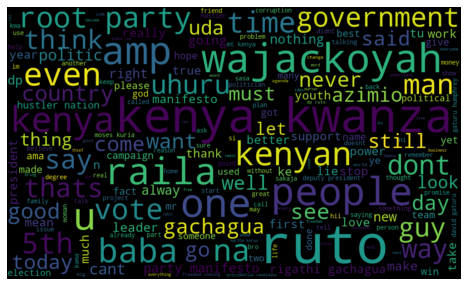

In [ ]:
# plot word cloud for sixth cluster
plot_wordcloud(cluster_6)

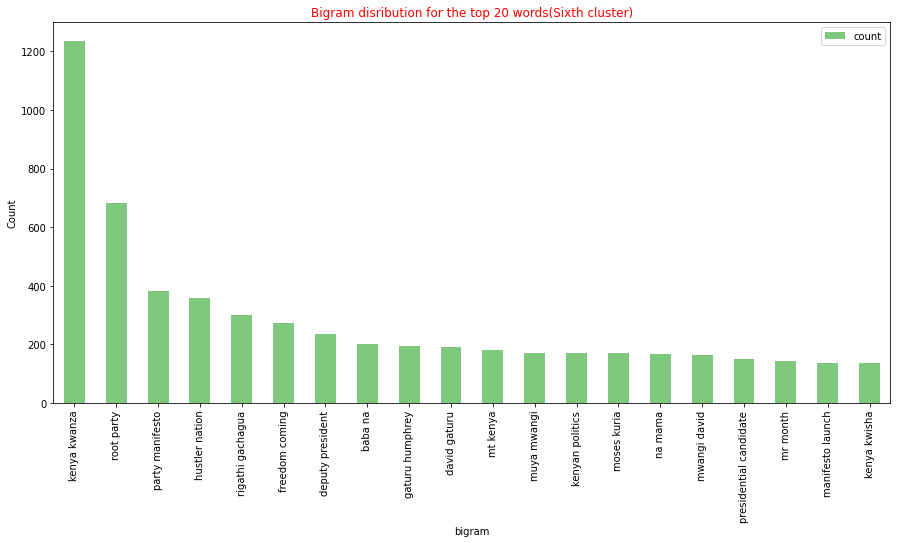

In [ ]:
# bigram plot for sixth cluster
bigram_plot(cluster_6,'Sixth cluster')

The sixth cluster takes focus off individual presidential aspirants to their parties, titles and supporters.

### 4 Clusters

In [ ]:
# using 4 clusters
from sklearn.cluster import KMeans

k = 4
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [ ]:
# creating a dataframe for these new clusters
df4 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])

In [ ]:
# plotting word cloud for each cluster
cluster_1 = df4[df4.cluster == 0]
cluster_2 = df4[df4.cluster == 1]
cluster_3 = df4[df4.cluster == 2]
cluster_4 = df4[df4.cluster == 3]

In [ ]:
# Preview 20 samples from this cluster
print(cluster_1.sample(20))

                                                    tweet  cluster
53029   contradiction pictute high woman fearful givin...        0
91120             ra0 dilarang p kcuali pcr ku alias ruto        0
73356                    kiti n yako ruto tunasema n wewe        0
120096  heart ruto blame handshake respect transfer po...        0
306426  wajackoyah kind question ruto never answer he ...        0
309251                       also agree madness vote ruto        0
47258   man guy league least ruto hasnt teargassed pla...        0
46705                                dede ruto maksud nya        0
310258  machua ruto generated billion wealth 5ish shor...        0
103891                      ini sihh yg di poto sama ruto        0
73010   vote wajackoyah vote raila vote raila vote uhu...        0
112401              ruto smt wrong 2 playing lol fair vs2        0
86852                                ruto die naked death        0
252003  didnt approve screening process said something...     

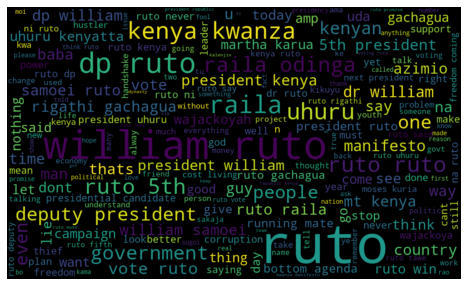

In [ ]:
# plotting for cluster 1
plot_wordcloud(cluster_1)

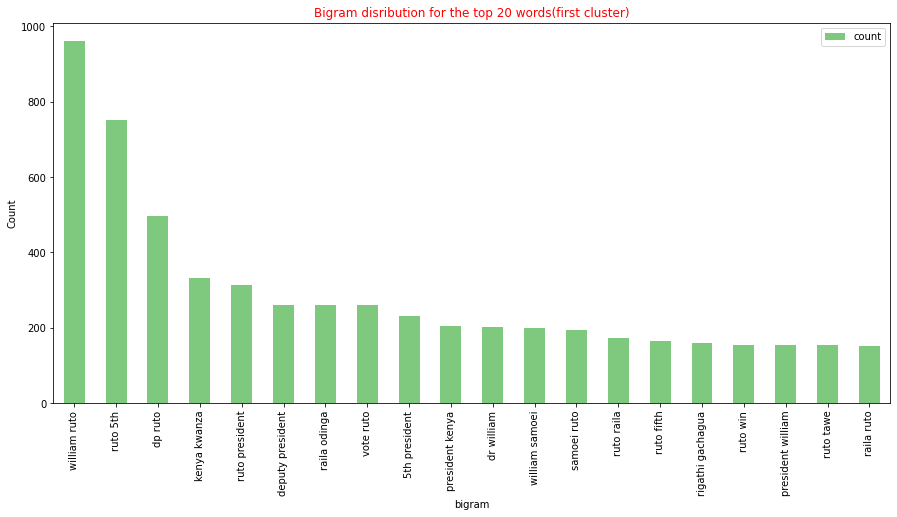

In [ ]:
# Top 20 words in first cluster
bigram_plot(cluster_1, 'first cluster')

First cluster contains events surrounding Ruto.

In [ ]:
# Preview 20 samples from this cluster
print(cluster_2.sample(20))

                                                    tweet  cluster
104593  unareason like hearbrokened whore freedom mora...        1
26685   azimio soldier confirm presence august 9th sen...        1
299142  u want kenyan vote empty stomachnone u talking...        1
239562  august 9 election divide country let u compete...        1
90230   aki jana wametutesa went bed early cant wait r...        1
156089         died kiamba killed behalf cord raila peace        1
109065           youve many promise sir make sure fulfill        1
193005                                             lovely        1
236130  iconic honestly believe dp satisfying need ken...        1
239392                thought kenya kwanza vyeo appointed        1
241969  kuria kabogo lodge complaint kenya kwanza chie...        1
248528                  decided join snatched victory sha        1
276629  welcome home baba missed north eastern ni kwa ...        1
41862   unasaidia jambazi ukaenae kwa office ama munaj...     

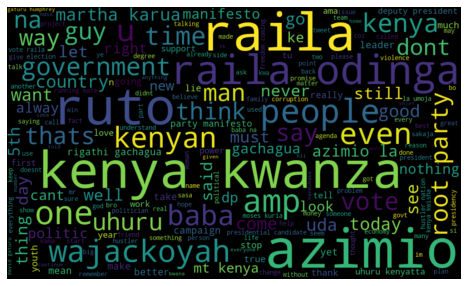

In [ ]:
# plotting for cluster 2
plot_wordcloud(cluster_2)

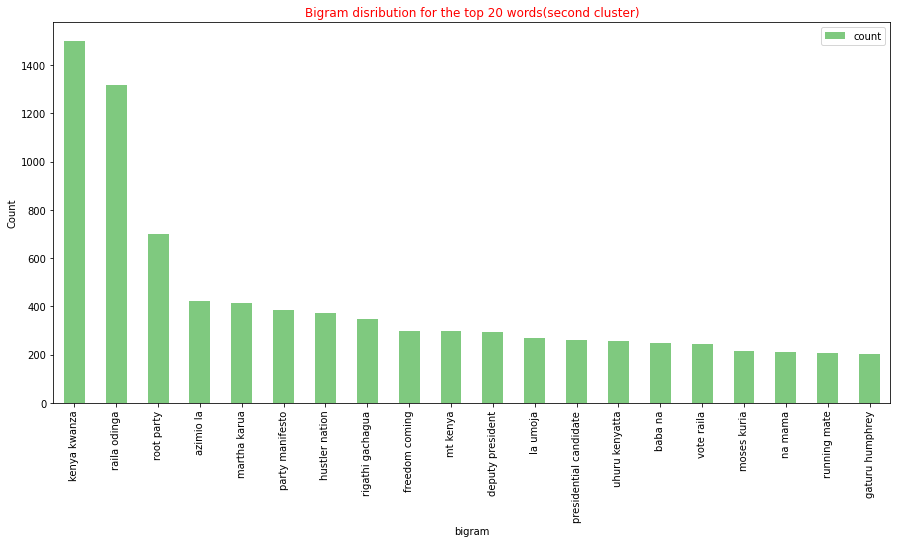

In [ ]:
# Top 20 words in second cluster
bigram_plot(cluster_2, 'second cluster')

The presidential aspirants, their running mates and their parties are most prominent in this cluster.

In [ ]:
# Preview 20 samples from this cluster
print(cluster_3.sample(20))

                                                    tweet  cluster
419347    think wajackoyah formidable agenda kenyan watch        2
201398                                  wajackoyah choice        2
386070     picture taken election wajackoyah declared 5th        2
197578                                   wajackoyah fifth        2
420833                             wajackoyah goodmorning        2
206139                                     wajackoyah 5th        2
205610                                         wajackoyah        2
208263         president wajackoyah fifth working silence        2
210130  raila azimio goon dynasty want whole country c...        2
421134                         hold wtf wajackoyah effect        2
203045  blogger wa dp wenye mnatumia jina wajackoyah s...        2
204155                     kenya wajackoyah ndio solution        2
422962  eugine wajackoyah absolutely 5th graft lord ke...        2
156882    inooro tv air wajackoyah hell beat raila odinga     

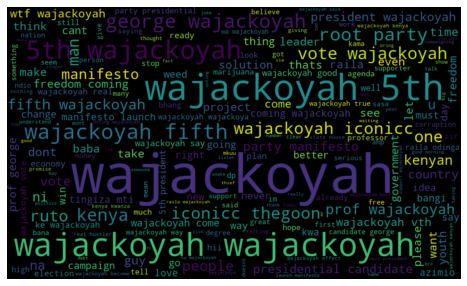

In [ ]:
# plotting for cluster 3
plot_wordcloud(cluster_3)

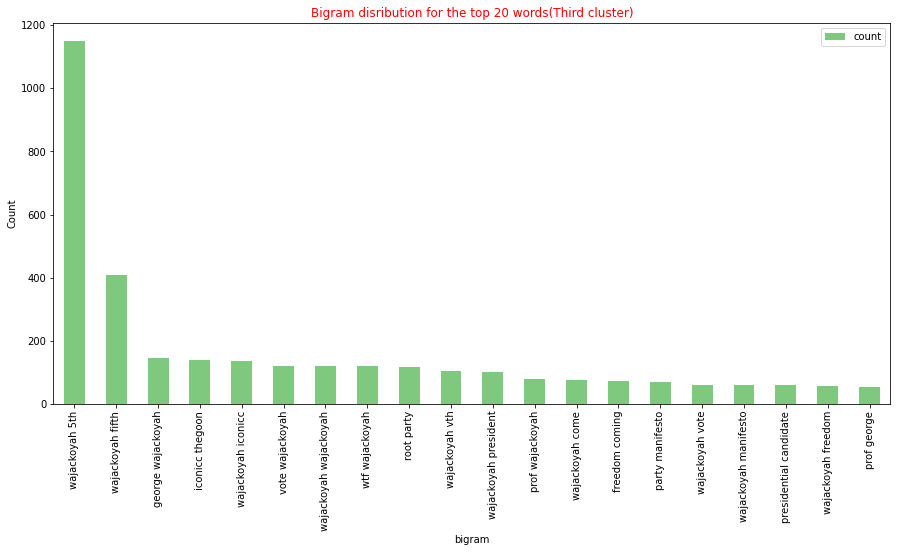

In [ ]:
# Top 20 words in third cluster
bigram_plot(cluster_3, 'Third cluster')

This cluster contains events surrounding presidential aspirant, Wajackoyah. 

In [ ]:
print(cluster_4.sample(20))

                                                    tweet  cluster
336790  actually fucking better thing watch like juras...        3
405086  ranked 5th competitive place world govt said c...        3
399288        ive asked create podcast like 5th time week        3
321787                             deleted photo make 5th        3
320696  one saying brilliant defender longer negative ...        3
334855                                  oinkers plead 5th        3
409747  except football cuz theyre 4th 5th best team t...        3
386946  jan 6 committee trump lapdog lawyer john eastm...        3
363539  jeff bezos said grinding 4 year result 5th yea...        3
326778  pair hit far tonight alex kirilloff one drove ...        3
402825  think finish 5th personally sure midfield bala...        3
320855  hey dummy bill 80 page amp 3000 word average 5...        3
403683  thought talking tour gave january 5th group ta...        3
329188  fantastic fun 5th grade tried make longest pro...     

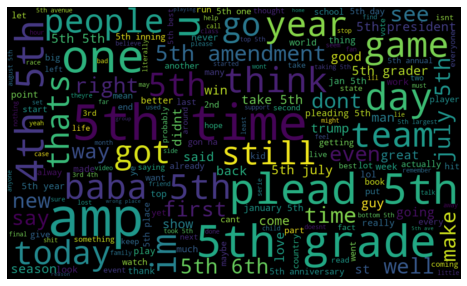

In [ ]:
# plotting for cluster 4
plot_wordcloud(cluster_4)

In [ ]:
# Top 20 words in fourth cluster
bigram_plot(cluster_4, 'fourth cluster')

The fourth cluster targets the phrase 'the fifth'.

### 5 Clusters

In [ ]:
# using 4 clusters
from sklearn.cluster import KMeans

k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [ ]:
# creating a dataframe for these new clusters
df6 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])

In [ ]:
# plotting word cloud for each cluster
cluster_1 = df6[df6.cluster == 0]
cluster_2 = df6[df6.cluster == 1]
cluster_3 = df6[df6.cluster == 2]
cluster_4 = df6[df6.cluster == 3]
cluster_5 = df6[df6.cluster == 4]

In [ ]:
# Preview 20 samples from this cluster
print(cluster_1.sample(20))

                                                    tweet  cluster
412573  really try hard politics however first rwanda ...        0
327134                                          tie 5 5th        0
342735  bennett amp lapid agreed hold vote dissolving ...        0
343170                            wood good till july 5th        0
369754  june 5 marked 0year anniversary daca july 6th ...        0
222000                                           baba 5th        0
370777  verlander couldve come 5th pitched maybe three...        0
395395  jinjer call symbol record check 5th single cal...        0
401365  baseball redhawks walkoff win happened home pl...        0
364982  ancient greek bronze helmet pseudocorinthian t...        0
355113  im ranked girl group individual brand reputati...        0
384650   hikaru shotaro best dancer 5th generation period        0
401205                                  5th grade clapout        0
332469  5th design overlook hotel room series red wash...     

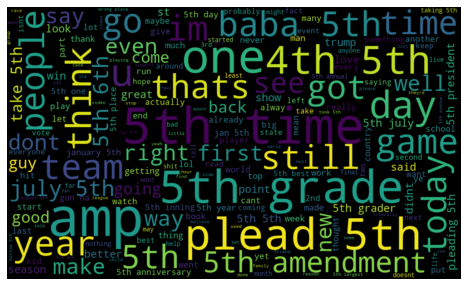

In [ ]:
# plotting for cluster 1
plot_wordcloud(cluster_1)

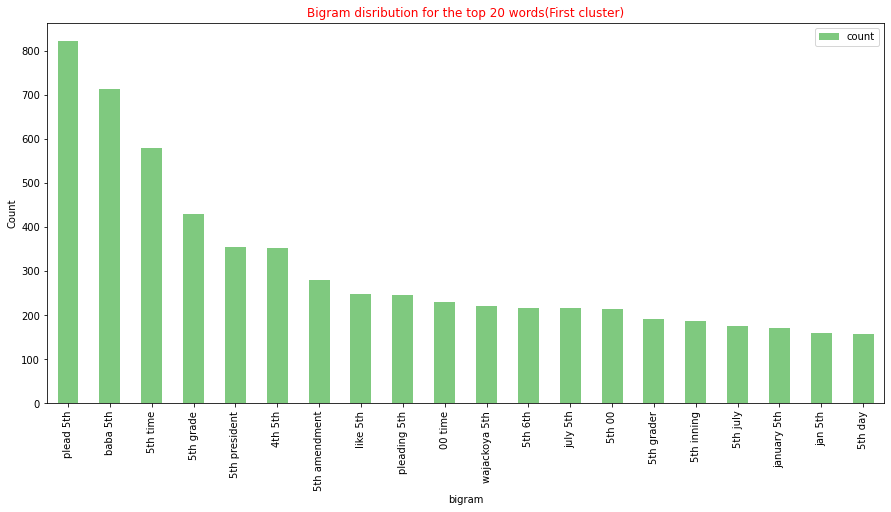

In [ ]:
# Top 20 words in first cluster
bigram_plot(cluster_1, 'First cluster')

The first cluster captures the numerous mentions of '5th' which can be attributed mostly to irrelenant data and also the fact that we shall be voting in the fifth president of Kenya.

In [ ]:
# Preview 20 samples from this cluster
print(cluster_2.sample(20))

                                                    tweet  cluster
414769                                     wajackoyah 5th        1
193993                                    wajackoyah jail        1
203971                              wajackoyah wajackoyah        1
194098                                     wajackoyah see        1
30340   dida wajackoyah behind fresh leader new idea r...        1
423750  long way maybe wajackoyah solution fix corrupt...        1
124755   munene opinion poll without wajackoyah null void        1
413218  wajackoyah legalize ganjaits given free u high...        1
423175                                     wajackoyah 5th        1
414189                                     wajackoyah 5th        1
417945                                wajackoyah tomorrow        1
204895                                juu wajackoyah real        1
413398                                sawa wajackoyah 5th        1
421996  wajackoyah never prepared suspension constitution     

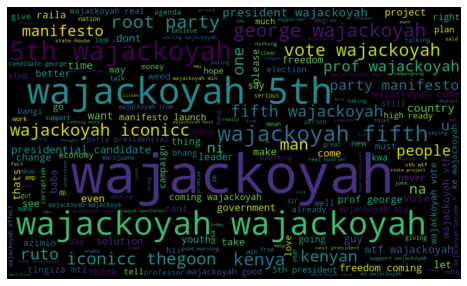

In [ ]:
# plotting for cluster 2
plot_wordcloud(cluster_2)

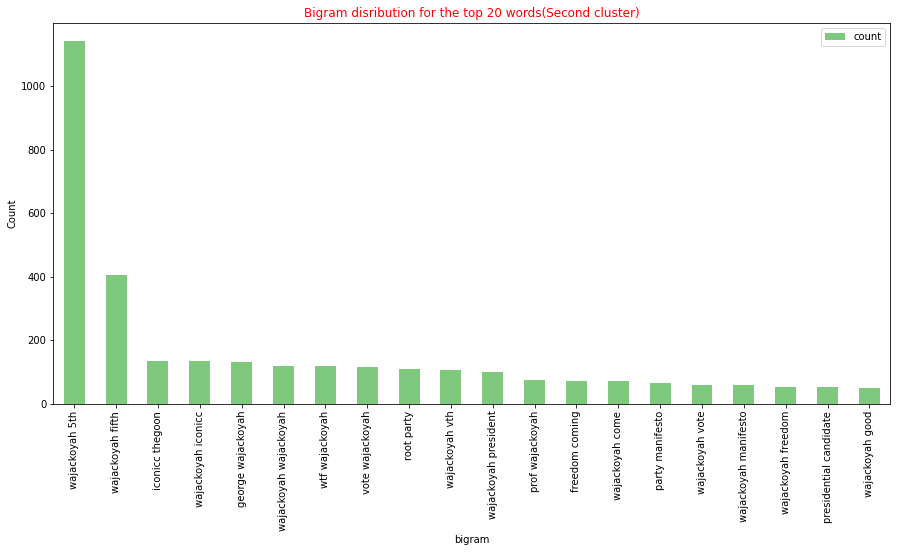

In [ ]:
# Top 20 words in second cluster
bigram_plot(cluster_2, 'Second cluster')

This cluster contains captures events and mentions of presidential aspirant, George Wajackoyah. 

In [ ]:
# Preview 20 samples from this cluster
print(cluster_3.sample(20))

                                                    tweet  cluster
412513  weshalb sollten wir den länger arbeiten wenn w...        2
269061  kabando wa omondi politics finishedbye bye son...        2
418943                              hussein 5thwajackoyah        2
30755   ambia zuchu sisi wafuasi wa root party hatupun...        2
213310  disapprove jubilee cant sing azimio uhuru chai...        2
137956                                      fence sitting        2
131236  according baba vote reduced rutos vote increas...        2
209647  igathe insinuating kikuyus use biggest cartel ...        2
153607  afternoon joined team snassir door door campai...        2
320768  slightly getting confuse since visual film far...        2
152936  karigu get leadership open door peoplebuild lo...        2
169550  maũndũ makwa maingĩ mahanaine na raila ithuĩ t...        2
48661   haaruto masa sihh jadi seneng bacanyaa thank c...        2
393957                                     acha ninyamaze     

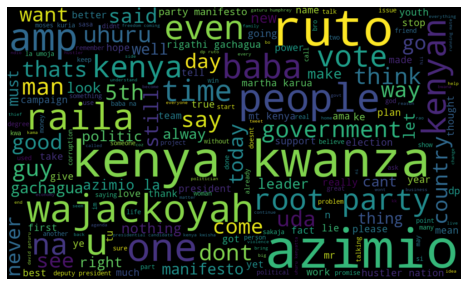

In [ ]:
# plotting for cluster 3
plot_wordcloud(cluster_3)

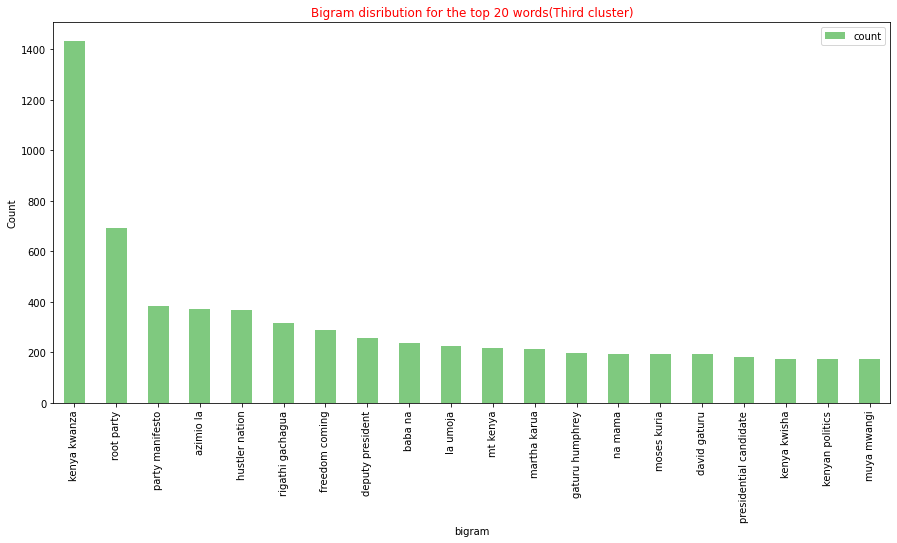

In [ ]:
# Top 20 words in third cluster
bigram_plot(cluster_3, 'Third cluster')

This cluster includes events surrounding all other events other than the rest of the clusters.

In [ ]:
# Preview 20 samples from this cluster
print(cluster_4.sample(20))

                                                    tweet  cluster
128699  believe kabogo first tell kenyan truth let ken...        3
66208   kitili manyora ananyora anything ruto please m...        3
233288  commitment deliver 00 day office dr william ru...        3
305762                       ruto surprise everyone doubt        3
108934        wacha kuogopa na ku meander say ruto period        3
37384    excluding ruto government uhururuto dispensation        3
96762   sportsman ruto asiyekubali kushindwa si mshind...        3
53872   yes alikuwa kwake si umbelekee ruto basi wako ...        3
91886                                                ruto        3
37470                                           president        3
46003   pale saturday nation uda presidential candidat...        3
422994                        btn ruto 2raila 3wajackoyah        3
75161   bring freedom home freedom unity freedom econo...        3
43678                   work ruto hiding isnt connmanship     

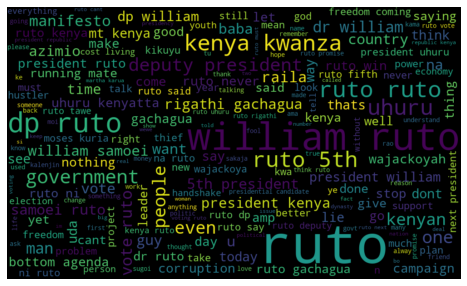

In [ ]:
# plotting for cluster 4
plot_wordcloud(cluster_4)

In [ ]:
# Top 20 words in fourth cluster
bigram_plot(cluster_4, 'Fourth cluster')

This cluster captures events surrounding presidential aspirant William Ruto.

In [ ]:
# Preview 20 samples from this cluster
print(cluster_5.sample(20))

                                                    tweet  cluster
180444  road election decisive lead raila odinga 5m 68...        4
188901  election toxic refuse vote dp he part problem ...        4
161014  fredrik least raila isnt embarrassed marriage ...        4
173673                                       w copy raila        4
213185  yuda guy think gumbo win big lose raila odinga...        4
283922  right siri wish could country nowbt desport uh...        4
160147                 raila retired prime minister think        4
151663                                        nesta raila        4
241063  abidemi either ruto join azimio raila join ken...        4
252335                 odanga go prophet owuor like raila        4
135600  let revisit nairobi north eastern raila nairob...        4
171029  martha today admit pushed kivuitu read fake 20...        4
353097  go knee 28 november 207 nasa led 5th president...        4
186255  approved uhurus project raila odinga doyen pol...     

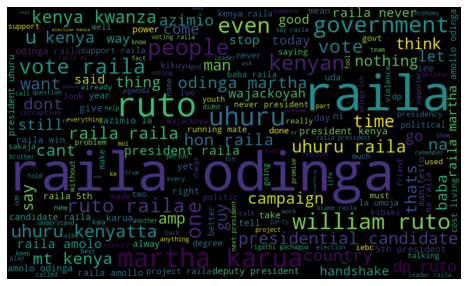

In [ ]:
# plotting for cluster 5
plot_wordcloud(cluster_5)

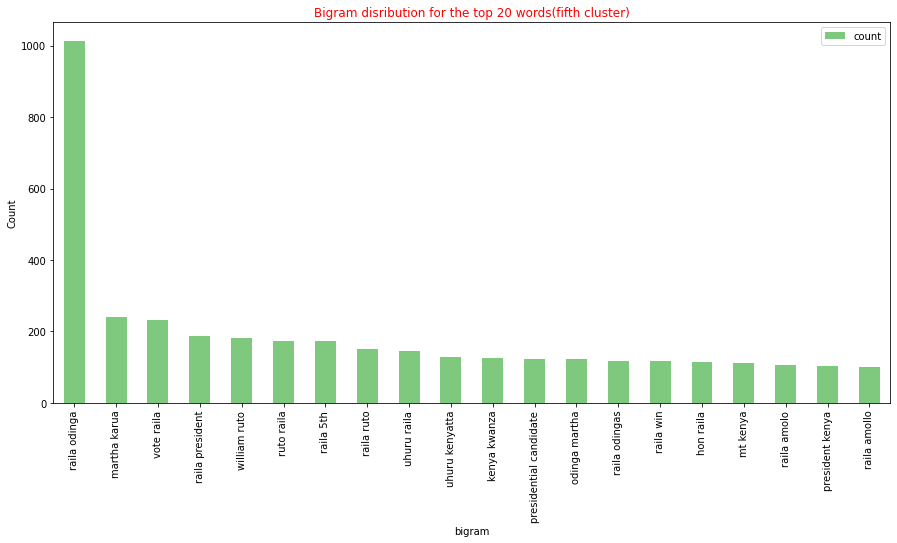

In [ ]:
# Top 20 words in fifth cluster
bigram_plot(cluster_5, 'fifth cluster')

This cluster captures events surrounding Presidential aspirant Raila Odinga.